In [5]:
import os
import pandas as pd
from fairseq.data import Dictionary
from fairseq import options, tasks, utils, checkpoint_utils
from fairseq.trainer import Trainer
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from transformers import BartTokenizer, BartForConditionalGeneration
import time

2023-08-08 18:00:21 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


In [3]:
train_data_path = pd.read_csv('Train_Truncated_Data.csv')

In [6]:
Truncated2 = train_data_path.head(300)

In [7]:
Truncated2

,src_content,tgt_content
0,national archives yes its time again folks i...,The unemployment rate dropped to 82 last mont...
1,los angeles ap in first interview since nba b...,Shelly Sterling plans eventually to divorce h...
2,gaithersburg md ap a small private jet crashe...,A twinengine Embraer jet that the FAA describ...
3,tucker carlson exposes his own sexism twitter ...,Tucker Carlson is in deep doodoo with conserv...
4,a man accused removing another mans testicle m...,What are the three most horrifying words in t...
...,...,...
295,bitcoins value crossed 15000 threshold first t...,To say its a meteoric rise isnt too hyperboli...
296,san francisco ap the jm smucker co withdrawin...,Four brands of dog food under the JM Smucker ...
297,the former facebook executive chamath palihapi...,Headlines focused this week on an exFacebook ...
298,national enquirer publishes photo alleges show...,Has the National Enquirer crossed a line Many...


In [16]:
# Load pre-trained BART model
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')/.]-[=]

In [17]:
df = Truncated2

In [36]:
# Custom Dataset and DataLoader
class CustomDataset(Dataset):
    def __init__(self, df, tokenizer, max_length):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        src_text = self.df.loc[idx, 'src_content'].strip()
        tgt_text = self.df.loc[idx, 'tgt_content'].strip()

        # Encode the inputs as tensors
        encoding = self.tokenizer.encode_plus(src_text, tgt_text, max_length=self.max_length, padding='max_length', return_tensors='pt', truncation=True)
        input_ids = encoding['input_ids'].squeeze()  # Remove extra batch dimension
        attention_mask = encoding['attention_mask'].squeeze()

        return input_ids, attention_mask

In [37]:
# Create custom dataset and dataloader
max_length = 512  # Set your desired maximum sequence length
dataset = CustomDataset(df, tokenizer, max_length)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


In [63]:
# Train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model.train()

num_epochs = 2  # Set the number of training epochs
learning_rate = 1e-4  # Set the learning rate
optimizer = Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [65]:
import time

start_time = time.time()

for epoch in range(num_epochs):
    total_loss = 0.0
    for input_ids, attention_mask in dataloader:
        input_ids, attention_mask = input_ids.to(device), attention_mask.to(device)
        labels = input_ids.clone()  # Clone input_ids to use as labels for summarization
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(dataloader)}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time:.2f} seconds')

# Save the trained model
model.save_pretrained('bartModel')

# Optionally, you can also save the tokenizer
tokenizer.save_pretrained('Barttokenizer')


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Epoch 1/3, Loss: 0.04326251426090797


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Epoch 2/3, Loss: 0.03502137379720807


Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pairs with the 'longest_first' truncation strategy. So the returned list will always be empty even if some tokens have been removed.
Be aware, overflowing tokens are not returned for the setting you have chosen, i.e. sequence pai

Epoch 3/3, Loss: 0.027028439001490673


('Berttokenizer\\tokenizer_config.json',
 'Berttokenizer\\special_tokens_map.json',
 'Berttokenizer\\vocab.json',
 'Berttokenizer\\merges.txt',
 'Berttokenizer\\added_tokens.json')

In [41]:
!pip install rouge-score


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24936 sha256=c18f2041e27c4a25fccd1bcd92dd982b95a5a63d91b9694de793eaf782d40f4b
  Stored in directory: c:\users\senth\appdata\local\pip\cache\wheels\9b\3d\39\09558097d3119ca0a4d462df68f22c6f3c1b345ac63a09b86e
Successfully built rouge-score


In [6]:
test_df = pd.read_csv('Test_Truncated_Data.csv')

In [7]:
test_df =test_df.head(100)

In [66]:
from rouge_score import rouge_scorer

# Function to generate summaries using the trained model
def generate_summary(model, tokenizer, src_text):
    input_ids = tokenizer.encode(src_text, return_tensors='pt', max_length=512, truncation=True)
    input_ids = input_ids.to(device)
    summary_ids = model.generate(input_ids, num_beams=4, max_length=150, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example function to calculate ROUGE scores
def calculate_rouge_scores(model, tokenizer, data_df):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []

    for idx, row in data_df.iterrows():
        src_text = row['src_content']
        tgt_text = row['tgt_content']

        generated_summary = generate_summary(model, tokenizer, src_text)
        print(generated_summary)

        scores = scorer.score(generated_summary, tgt_text)

        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)

    avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
    avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
    avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)

    return avg_rouge1, avg_rouge2, avg_rougeL

# Assuming you have a test DataFrame named 'test_df' with columns 'src_content' and 'tgt_content'
# Call the function to calculate the ROUGE scores
avg_rouge1, avg_rouge2, avg_rougeL = calculate_rouge_scores(model, tokenizer, test_df)

# Print the average ROUGE scores
print(f"Average ROUGE-1: {avg_rouge1}")
print(f"Average ROUGE-2: {avg_rouge2}")
print(f"Average ROUGE-L: {avg_rougeL}")


2023-07-31 00:02:58 | INFO | absl | Using default tokenizer.


GOP Eyes Gains As Voters In 11 States Pick Governors   Enlarge this image toggle caption Jim ColeAP    Voters in 11 states will pick their governors tonight and Republicans appear on track to increase their numbers by at least one with the potential to extend their hold to more than twothirds of the nations top state offices   but Eight of the gubernatorial seats up for grabs are now held by Democrats three are in Republican hands Republicans currently hold 29 governorships Democrats have 20 and Rhode Islands Gov Lincoln chafee is an Independent   Polls and race analysts suggest that only three of tonights contests are considered competitive all in states where incumbent Democratic governors arent running again Montana New Hampshire and Washington   while those state races
ca    the UPDATE 4192001 Read Richard Metzger How I a married middleaged man became an accidental spokesperson for gay rights overnight on Boing Boing   a Its time to clarify a few details about the controversial Hey

The US Census Bureau reported Wednesday that 16 million children living in America received food stamps in 2014 or about one out of every five kids   
For members of the deaf community ordering food or drinks at a drivethru can be a frustrating or even impossible experience But as one deaf woman recently discovered Starbucks is trying to make this feature accessible for customers with disabilities  with the help of a little technology    On Tuesday 28yearold Rebecca King of St Augustine Florida uploaded a video to Facebook which reveals what happened during her visit to a local Starbucks drivethree   The video shows King driving up to the ordering kiosk A womans voice emits from the intercom , Hi welcome to Starbucks the woman says What can we get started for you today   King does not respond and waits in her seat A few moments later a Starbucks barista appears on a monitor 
It is illegal to take conch shells with living organisms from Florida beaches Photo breckeni Getty ImagesiStockp

Rihanna stepped out in New York in one of her most revealing daytime looks yet  as she continues to rebel against handlers who have been urging her to tone down her wild behavior    The singer was seen shopping in SoHo in a revealing and seethrough tiny pink strapless bra with a pleated skirt showing off her flat stomach and toned arms   but The star who matched her look with Converse sneakers sunglasses and bright yellow talon nails wandered around the SoHo shops with girlfriends before heading to Da Silvano for an early dinner   she cancelled a trip to the UK last week insisting she needed to spend more time with her family and her grandmother Dolly who is suffering from cancer She was spotted catching
football fans get ready to rock While theres no telling which two teams will face off when Super Bowl LIII hits Atlanta on February 3 a source tells Us that Maroon 5 have been tapped to grace the halftime stage    The offer has been extended and theyve pretty much accepted says the ins

the exchange sent out a series of emails alerting investors that it was experiencing issues with quote submissions In response the New York Stock Exchange has also stopped trading in all Nasdaq securities at the request of Nasdaq OMX All orders in those securities have been cancelled back to customers said NYSE in a statement The Nasdaq Composite index NASDAQCOMP was last at 363117 up 3138 points before trading was suspended There was no immediate word on when transactions will resume Updated with NYSE developments   
c    the   but   hand Grips Clinically Proven Beneficial for Prevention of Low back Injuries  or   Dont let snow shovelling be a pain in your back   welcome to MOTUS We manufacture hand grips that offer arthritis and back pain relief and reduce the risk of repetitive strain injuries including Carpal Tunnel Syndrome and tendinitis   or   Motus grips are a snow shovel accessory that make snow shovels easier to work with Use the Dgrip and the Tgrip on shovels scoops pusads a

Ardent Donald Trump supporter Scott Baio was allegedly physically attacked by the wife of a Red Hot Chili Peppers band member for supporting the presidentelect The actor filed a police report claiming Nancy Mack who is married to Red Hot chili Peppers drummer Chad Smith went off on him for supporting Trump at a function with their elementary school kids TMZ reports    sc Baio Claims Physical Attack by Chili Peés Wife Over Trump   TMZ December 15 2016   Authorities say Scott Baij was at an event with his daughter on Saturday in Thousand Oaks California when Mack confronted him and allegedly began chiding and cursing him Macks husband has been vocal about being antiDonald Trump citing him as a racist Baio is one of Trumps strongest celebrity
breaking News Emails Get breaking news alerts and special reports The news and stories that matter delivered weekday mornings    Updated By Corky Siemaszko   more former Ohio State University wrestlers have come forward to contradict Rep Jim Jordans 

A rookie cop who shot and killed an unarmed Brooklyn man in an unlit housing project staircase was indicted for manslaughter Tuesday the Daily News has learned   In a blockbuster grand jury decision Peter Liang will face criminal charges that can send him to prison for up to 15 years for the death of Akai Gurley on Nov 20 a source said    The secret panel started hearing the case on Feb 4 A spokeswoman for the Brooklyn District Attorney declined to comment   A source said Liang 27 been indicted for a top count seconddegree manslaughter which means he acted recklessly He was also charged with reckless endangerment seconddegree assault and official misconduct another source said the   Im glad the grand jury looked at the evidence and returned an indictment
DULUTH Minn  Authorities are releasing more information about the elderly Duluth couple found dead on Saturday    Duluth police say Ron Tarnowski 82 and Mary tarnowski 78 were found on Saturday shortly before 4 pm after they were missi

CNN Hillary Clinton is not considering Bernie Sanders as a running mate a Democrat familiar with the decision tells CNN    Sanders who has still not yet officially conceded the Democratic presidential primary to Clinton was not expecting to be considered as Clintons vice president and he does not view her decision as a slight according to a person close to him  
 infrequent many people are not aware of their condition until their malignancy becomes advanced and spreads into the lymph nodes A colonoscopy is the usual screening test but stool tests are also effective for some people If you are worried you can request your primary care physician provide you with one of these simple stool tests no matter your age    Younger Patients Increasing   seeing a recent rise in cancer cases among younger people a team led by Dr Samantha Hendren conducted a study of the nationally representative Surveillance Epidemiology and End Results SEER Program of the National Cancer Insitute to assess age and 

The worlds ugliest color has been described as death dirty and tar but this odious hue is serving an important purpose discouraging smoking    Pantone 448 C a drab dark brown also called opaque couché was specifically selected after three months and multiple studies by research agency GfK The agency was hired by the Australian government to find a color that was so repugnant that if it was on tobacco products it would dissuade people from smoking or   A man smokes a cigarette on September 25 2014 in Paris holding a sample of a plain cigarette packaging cigarette box THOMAS SAMSONAFPGetty Images THOMas SAMSONOTOGetty Images   The new color was adopted for all tobacco packaging along with graphic health warnings Now
CLOSE With the World Series tied at 11 USA TODAY Sports Steve Gardner tells you how the Cubs got the victory in Game 2 over the Indians USA TODAY sports    Cubs player Kyle Schwarber hits an RBI single against the Indians in the fifth inning of Game 2 Photo Charles LeClaireus

In [91]:
import matplotlib.pyplot as plt
print(avg_rouge1)
print(avg_rouge2)
print(avg_rougeL)

0.3145021757348166
0.08741010313711728
0.15911799872754506


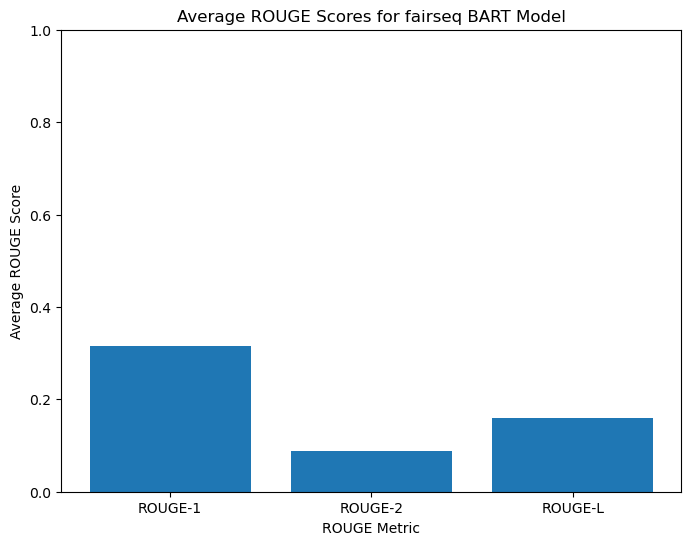

In [93]:
avg_rouge1 = 0.3145021757348166
avg_rouge2 = 0.08741010313711728
avg_rougeL = 0.15911799872754506

# ROUGE metric names
rouge_metrics = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']

# Average ROUGE scores
avg_rouge_scores = [avg_rouge1, avg_rouge2, avg_rougeL]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(rouge_metrics, avg_rouge_scores)
plt.xlabel('ROUGE Metric')
plt.ylabel('Average ROUGE Score')
plt.title('Average ROUGE Scores for fairseq BART Model')
plt.ylim(0, 1)  # Set the y-axis limit to range from 0 to 1 (ROUGE scores are between 0 and 1)

# Set y-axis ticks and format
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.show()


In [8]:
def generate_summary_customInput(model, tokenizer, src_text):
    input_ids = tokenizer.encode(src_text, return_tensors='pt', max_length=512, truncation=True)
    input_ids = input_ids.to(device)
    summary_ids = model.generate(input_ids, num_beams=4, max_length=150, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary


In [9]:
# Assuming you have a test DataFrame named 'test_df' with columns 'src_content' and 'tgt_content'
# Select a custom row from the test_df
custom_row_idx = 3  # Change this to the index of the desired row in the test_df
custom_src_text = test_df.loc[custom_row_idx, 'src_content']

# Generate summary for the custom input
summary = generate_summary_customInput(model, tokenizer, custom_src_text)
print("Custom Input:")
print(custom_src_text)
print("\nGenerated Summary:")
print(summary)


NameError: name 'model' is not defined